In [106]:
"""At first we need to import needed libraries and dowload file with data"""
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
sns.set()
study0 = pd.read_csv(
    'https://lms.skillfactory.ru/assets/courseware/v1/425d6864db937e4ebabc972e581769ab/asset-v1:Skillfactory+DST-WEEKLY-2.0+08JULY2020+type@asset+block/stud_math.csv')
study = study0
display(study.info())
display(study)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

None

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [107]:
"""There is one strange column: 'studytime, granular'
We don't have a description for it, maybe it needs to be dropped.
Let's compare it with 'studytime' column:"""
print(study['studytime'].value_counts())
print(study['studytime, granular'].value_counts())

2.0    194
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64
-6.0     194
-3.0     103
-9.0      64
-12.0     27
Name: studytime, granular, dtype: int64


In [108]:
"""I suggest, that 'studytime, granular' is the 'studytime' multiplied on (-3),
so they must be inversaly to each other""" 
study.corr()# Check the correlation


,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.161704,-0.138018,0.081508,-0.015556,0.228047,0.015556,0.068899,0.029023,0.135107,-0.065946,0.093592,-0.155726
Medu,-0.161704,1.000000,0.275598,-0.173515,0.078589,-0.245463,-0.078589,-0.010050,0.025335,0.064164,-0.045051,-0.011944,0.213349
Fedu,-0.138018,0.275598,1.000000,0.030646,0.057199,-0.150821,-0.057199,0.040577,-0.066556,-0.023282,0.027251,0.004695,0.078573
traveltime,0.081508,-0.173515,0.030646,1.000000,-0.102206,0.064699,0.102206,-0.016857,-0.021937,0.037636,-0.021531,-0.048215,-0.070559
studytime,-0.015556,0.078589,0.057199,-0.102206,1.000000,-0.178992,-1.000000,0.045894,-0.121969,-0.051280,-0.080016,-0.026544,0.115741
failures,0.228047,-0.245463,-0.150821,0.064699,-0.178992,1.000000,0.178992,-0.022655,0.098382,0.120914,0.081284,0.057391,-0.344338
"studytime, granular",0.015556,-0.078589,-0.057199,0.102206,-1.000000,0.178992,1.000000,-0.045894,0.121969,0.051280,0.080016,0.026544,-0.115741
famrel,0.068899,-0.010050,0.040577,-0.016857,0.045894,-0.022655,-0.045894,1.000000,0.175743,0.081154,0.077474,-0.082609,0.057112
freetime,0.029023,0.025335,-0.066556,-0.021937,-0.121969,0.098382,0.121969,0.175743,1.000000,0.296437,0.061575,0.009292,0.019026
goout,0.135107,0.064164,-0.023282,0.037636,-0.051280,0.120914,0.051280,0.081154,0.296437,1.000000,-0.015608,-0.048738,-0.129685


In [109]:
'''We see that correlation of 'studytime' and 'score' 
is inversaly to 'studytime, granular' and 'score', so we can drop the last'''
study.drop(['studytime, granular'], inplace=True, axis=1)
study.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [110]:
study.describe()  # Check out for issues

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


In [111]:
'''We see some issues:
 - famrel has -1 min values
 - absences can not be over 365
 - score = 0 is strange values, we need to check them '''
study[study.famrel < 1]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
25,GP,F,16,U,GT3,NaN,2.0,2.0,services,services,home,mother,1.0,1.0,2.0,no,yes,yes,no,no,yes,yes,no,-1.0,2.0,2.0,5.0,14.0,40.0


In [112]:
# There is only one value under 1, I think, that this is 1 at real:
study.loc[study.famrel == -1, ('famrel')] = 1

In [113]:
study[study.absences > 365]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
222,GP,F,16,U,GT3,T,2.0,3.0,services,teacher,other,mother,1.0,2.0,0.0,yes,NaN,no,no,yes,yes,yes,no,2.0,3.0,1.0,3.0,385.0,85.0


In [114]:
# This is a mistake, maybe it is 3 and 85(score value):
study.loc[study.absences == 385, ('absences')] = 3

In [115]:
study[study.score == 0].describe()  # Look for null values

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
count,37.000000,36.000000,34.000000,32.000000,37.000000,35.000000,34.000000,36.000000,36.000000,35.000000,36.0,37.0
mean,17.054054,2.333333,2.323529,1.500000,1.945946,0.857143,3.823529,3.111111,3.166667,3.657143,0.0,0.0
std,1.311190,1.041976,1.147344,0.718421,0.911225,1.033067,1.028992,0.887300,1.341641,1.304807,0.0,0.0
min,15.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0
25%,16.000000,1.750000,1.000000,1.000000,1.000000,0.000000,3.000000,3.000000,2.000000,3.000000,0.0,0.0
50%,17.000000,2.000000,2.000000,1.000000,2.000000,1.000000,4.000000,3.000000,3.000000,4.000000,0.0,0.0
75%,18.000000,3.000000,3.000000,2.000000,2.000000,1.000000,4.750000,4.000000,4.000000,5.000000,0.0,0.0
max,19.000000,4.000000,4.000000,3.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,0.0,0.0


25-й percentile: 40.0, 75-й percentile: 70.0, IQR: 30.0,  Outliers range: [-5.0, 115.0].
Outliers: []


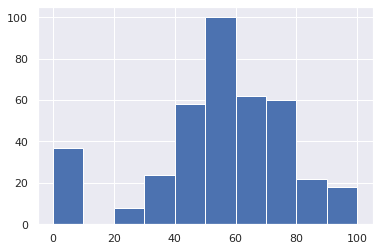

In [116]:
# For now I have no reason to drop the null values

"""In the future we'll often need to calculate IQR and outliers, 
so It will be convenient to create function:"""


def iqr(x):
    median = x.median()
    IQR = x.quantile(0.75) - x.quantile(0.25)
    perc25 = x.quantile(0.25)
    perc75 = x.quantile(0.75)
    outliers = []
    print('25-й percentile: {},'.format(perc25),
          '75-й percentile: {},'.format(perc75),
          "IQR: {}, ".format(IQR),
          "Outliers range: [{f}, {l}].".format(f=perc25 - 1.5*IQR,
                                               l=perc75 + 1.5*IQR))
    for i in x:
        if (i < perc25 - 1.5*IQR) or (i > perc75 + 1.5*IQR):
            outliers.append(i)
    x.hist()
    print('Outliers:', outliers)


iqr(study.score)

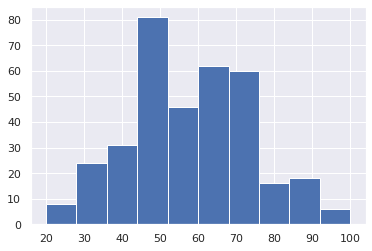

In [117]:
"""The null values is in range [-5.0,115.0], but I suppose that this students
were not on the exams, so I'll drop the null values:"""

study.drop(study[study.score == 0].index, inplace=True)
study.score.hist()

25-й percentile: 2.0, 75-й percentile: 8.0, IQR: 6.0,  Outliers range: [-7.0, 17.0].
Outliers: [25.0, 54.0, 18.0, 26.0, 20.0, 18.0, 56.0, 24.0, 18.0, 28.0, 22.0, 18.0, 20.0, 21.0, 75.0, 22.0, 30.0, 19.0, 20.0, 38.0, 18.0, 20.0, 22.0, 40.0, 23.0, 212.0]


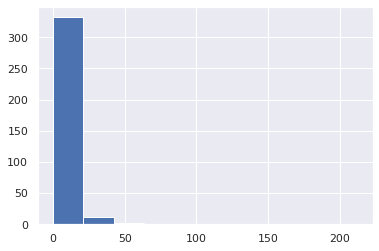

In [118]:
iqr(study.absences)  # How much outliers in absebces

In [119]:
study[study.absences > 17]  # Look at outliers

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
40,GP,F,16,U,LE3,T,2.0,2.0,other,other,home,mother,2.0,2.0,1.0,no,NaN,no,yes,no,yes,yes,yes,3.0,3.0,3.0,3.0,25.0,55.0
74,GP,F,16,U,GT3,T,3.0,3.0,other,services,home,mother,1.0,2.0,0.0,yes,yes,yes,yes,yes,yes,yes,no,4.0,NaN,3.0,5.0,54.0,55.0
89,GP,M,16,U,LE3,A,4.0,4.0,teacher,health,reputation,mother,1.0,2.0,0.0,no,yes,no,no,yes,yes,no,no,4.0,1.0,NaN,5.0,18.0,35.0
103,GP,F,15,U,GT3,T,3.0,2.0,services,other,home,mother,2.0,2.0,0.0,yes,yes,yes,no,yes,yes,yes,no,4.0,3.0,5.0,2.0,26.0,30.0
118,GP,M,17,R,GT3,T,1.0,3.0,other,NaN,course,father,3.0,2.0,1.0,no,yes,no,yes,yes,yes,NaN,no,NaN,2.0,4.0,5.0,20.0,40.0
123,GP,M,16,U,GT3,T,4.0,4.0,health,other,course,mother,1.0,1.0,0.0,no,yes,no,yes,yes,yes,yes,no,3.0,4.0,4.0,5.0,18.0,65.0
183,GP,F,17,U,LE3,NaN,3.0,3.0,other,other,reputation,mother,1.0,2.0,0.0,no,yes,no,yes,yes,yes,yes,yes,5.0,3.0,3.0,1.0,56.0,40.0
198,GP,F,17,U,GT3,NaN,4.0,4.0,services,teacher,home,mother,2.0,1.0,1.0,no,yes,no,no,yes,yes,NaN,no,4.0,2.0,4.0,2.0,24.0,90.0
203,GP,F,17,R,GT3,T,2.0,2.0,other,other,reputation,mother,1.0,1.0,0.0,no,yes,no,no,yes,yes,yes,no,5.0,3.0,2.0,3.0,18.0,30.0
205,GP,F,17,U,GT3,T,3.0,4.0,at_home,services,home,mother,1.0,3.0,1.0,no,yes,yes,no,yes,yes,yes,yes,4.0,4.0,3.0,5.0,28.0,45.0


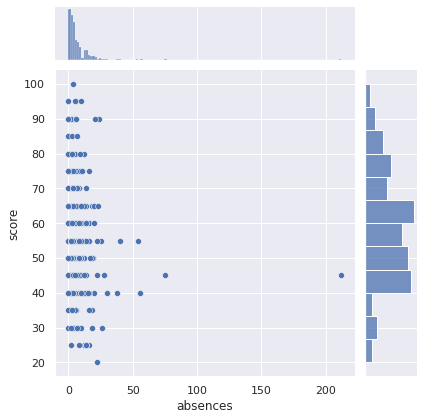

In [120]:
sns.jointplot(x=study.absences, y=study.score)

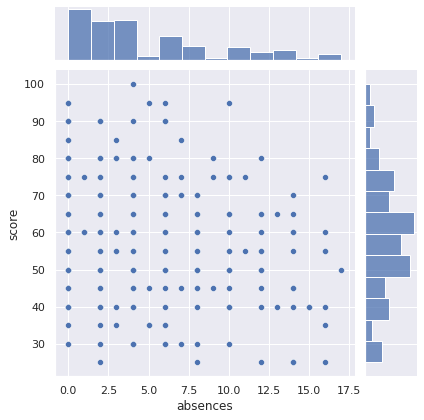

In [121]:
# Let's drop the outliers and look for the changes
study.drop(study[study.absences > 17].index, inplace=True)
sns.jointplot(x=study.absences, y=study.score)

25-й percentile: 16.0, 75-й percentile: 18.0, IQR: 2.0,  Outliers range: [13.0, 21.0].
Outliers: [22]


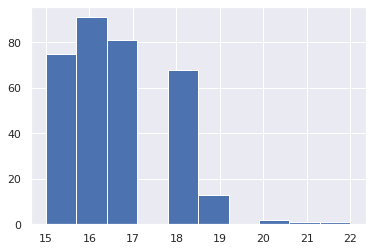

In [122]:
''' We see the dependence: upper left corner is filled more tightly.
This means that students with less absences take higher scores.
Let's check for other numeric columns:'''
iqr(study.age)

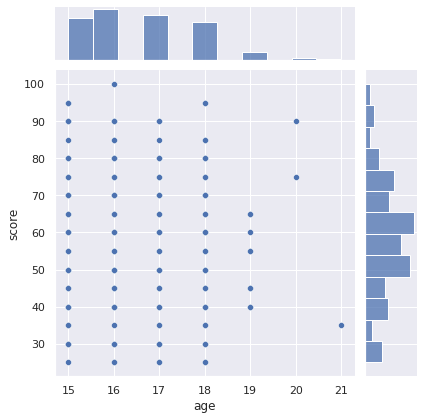

In [123]:
study.drop(study[study.age > 21].index, inplace=True)
sns.jointplot(x=study.age, y=study.score)

25-й percentile: 2.0, 75-й percentile: 3.0, IQR: 1.0,  Outliers range: [0.5, 4.5].
Outliers: [40.0, 0.0, 0.0]


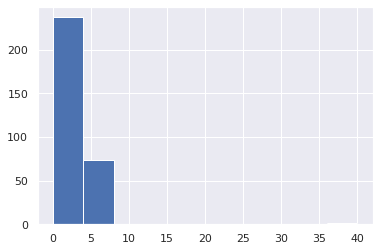

In [124]:
# There is no strong dependence here
iqr(study.Fedu)  # Next column

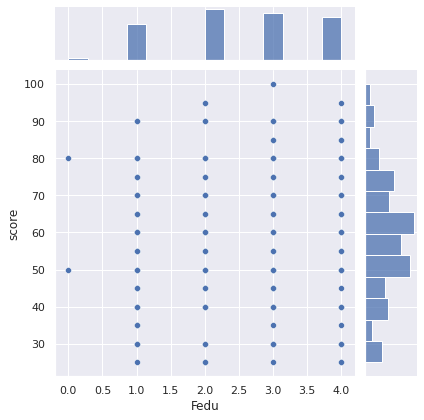

In [125]:
# Change 40 to 4:
study.loc[study.Fedu == 40, ('Fedu')] = 4
sns.jointplot(x=study.Fedu, y=study.score)

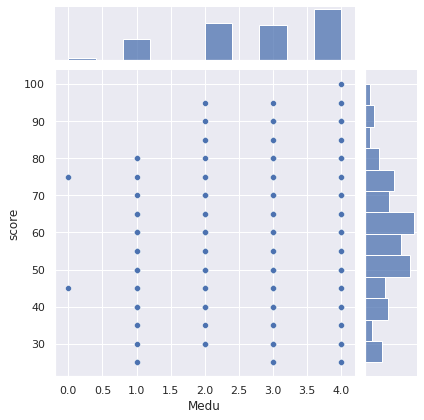

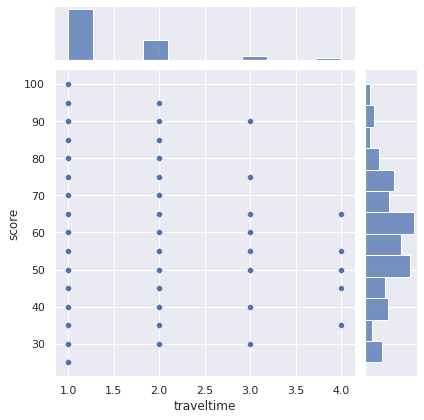

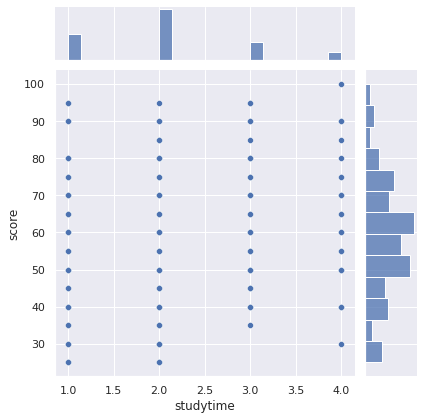

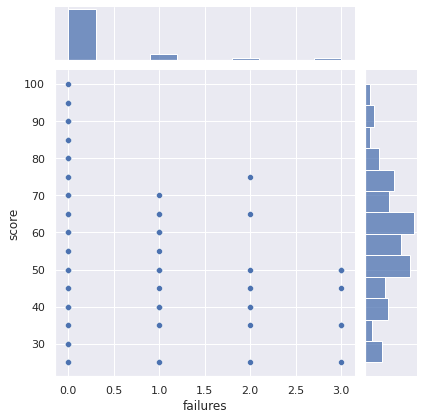

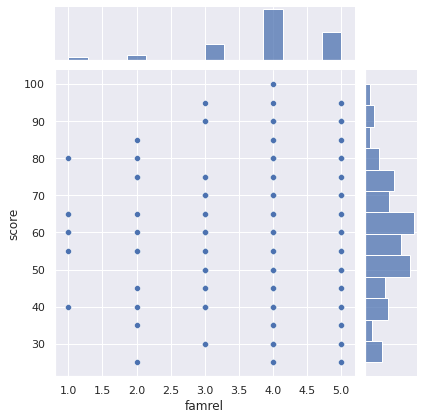

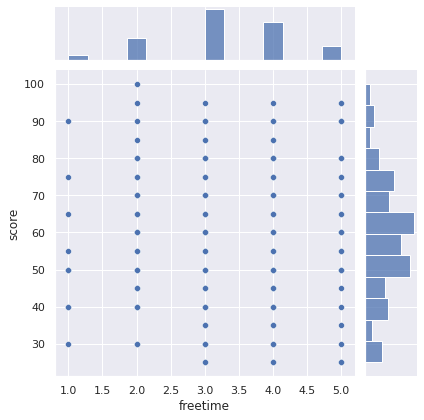

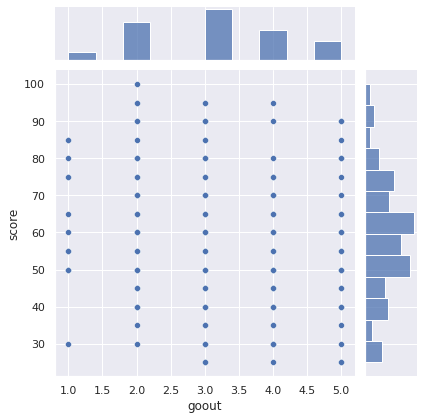

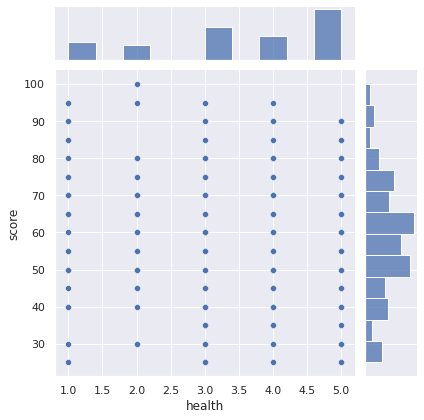

In [103]:
'''There is no strong dependence here.
The last columns have not a big variaty of values.
Let's make plots for them:'''
for i in ['Medu',
          'traveltime',
          'studytime',
          'failures',
          'famrel',
          'freetime',
          'goout',
          'health']:

    sns.jointplot(x=study[i], y=study.score)

# **Intermediate conclusions**
We have analysed numeric values, and now we see some dependences with score:

*   Absences
*   Medu 
*   Traveltime
*   Failures
*   Famrel













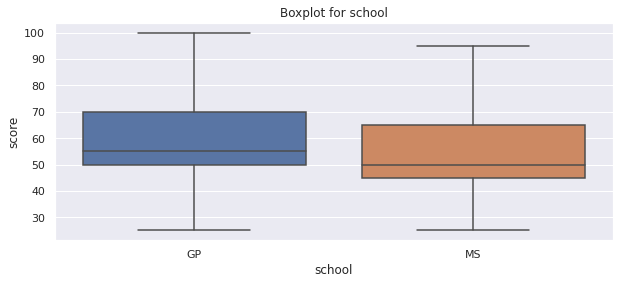

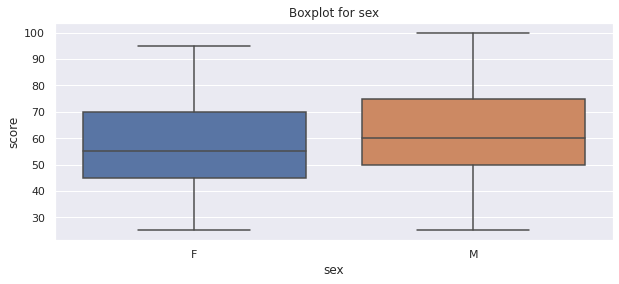

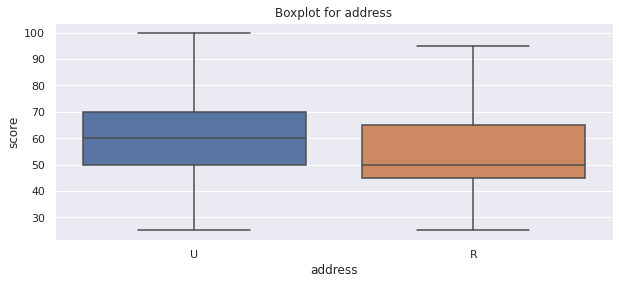

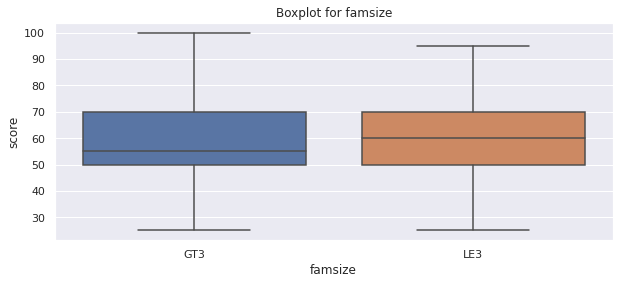

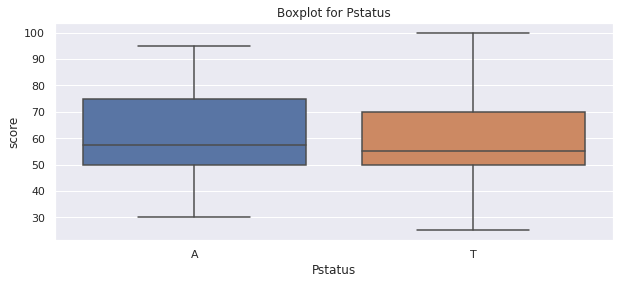

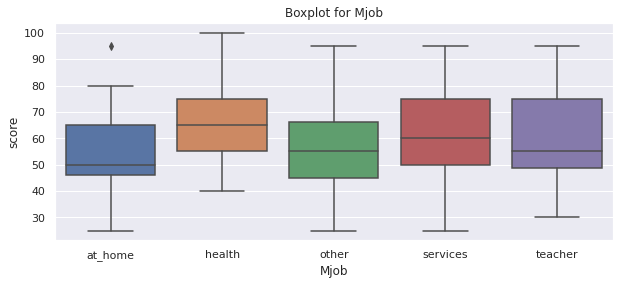

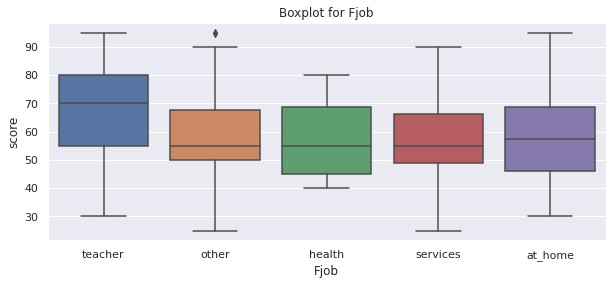

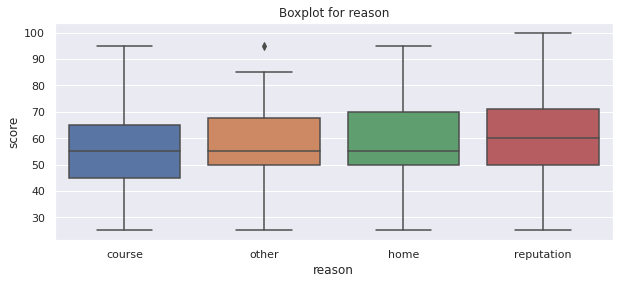

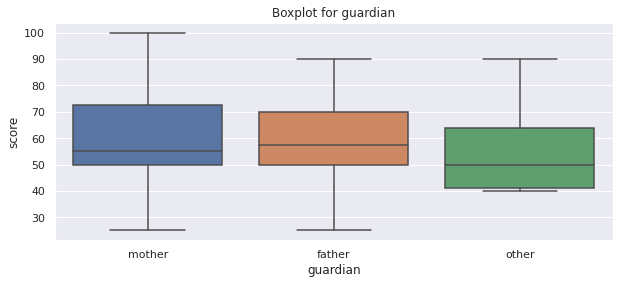

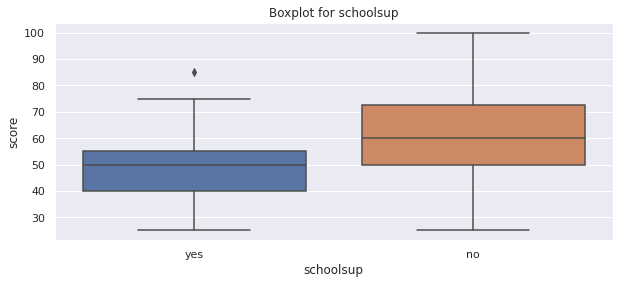

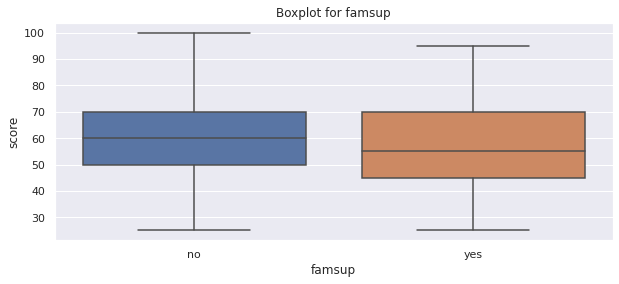

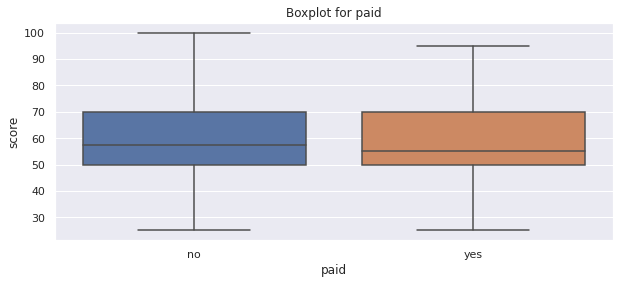

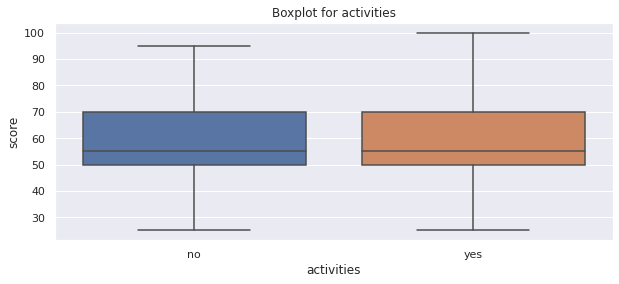

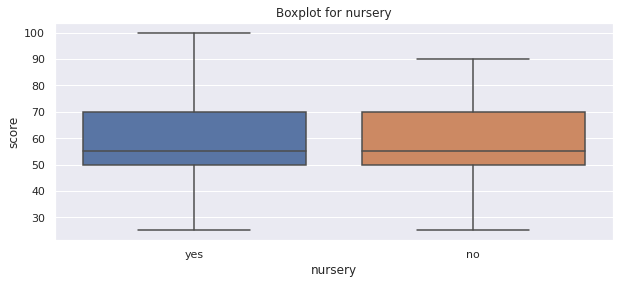

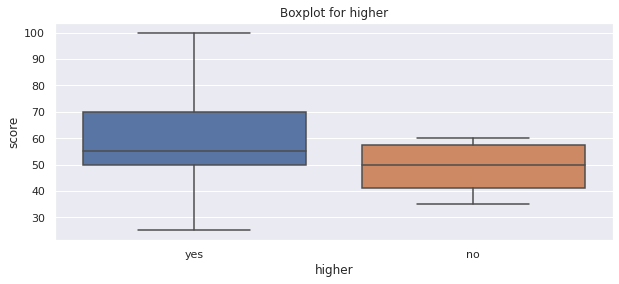

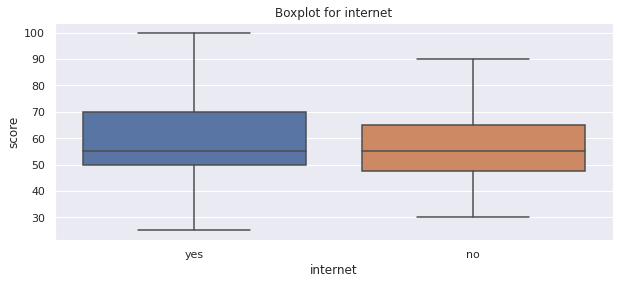

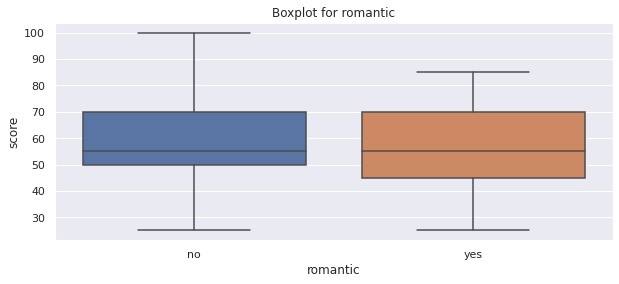

In [104]:
'''Now let's check the nominative values and build plots for them:'''
for i in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason',
          'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
          'higher', 'internet', 'romantic'
          ]:

    fig, ax = plt.subplots(figsize=(10, 4))
    sns.boxplot(x=study[i], y=study.score,
                data=study.score, ax=ax)
    ax.set_title('Boxplot for ' + i)
    plt.show()

In [105]:
'''We do not need to use these columns in our model:
Pstatus, famsup , paid , activities , nursery , internet, romantic'''
study_for_model = study.loc[:, ['absences', 'Medu', 'traveltime', 'failures',
                                'famrel','school', 'sex', 'address', 'famsize', 
                                'Mjob', 'Fjob', 'reason','guardian', 
                                'schoolsup', 'higher', 'score']]  

study_for_model.head()                            

,absences,Medu,traveltime,failures,famrel,school,sex,address,famsize,Mjob,Fjob,reason,guardian,schoolsup,higher,score
0,6.0,4.0,2.0,0.0,4.0,GP,F,U,NaN,at_home,teacher,course,mother,yes,yes,30.0
1,4.0,1.0,1.0,0.0,5.0,GP,F,U,GT3,at_home,other,course,father,no,yes,30.0
2,10.0,1.0,1.0,3.0,4.0,GP,F,U,LE3,at_home,other,other,mother,yes,yes,50.0
3,2.0,4.0,1.0,0.0,3.0,GP,F,U,GT3,health,NaN,home,mother,no,yes,75.0
4,4.0,3.0,1.0,0.0,4.0,GP,F,U,GT3,other,other,home,father,no,yes,50.0


#**Conclusion**
I've created the DataFrame with parameters that have influence on score value. Let's describe it:


*   Students have a higher score if they don't miss lessons.
*   Father's education has a good influence on score.
*   If student has not to lose his time to get to the school, he will get higher score.
*   Only the students without failures take the max score.
*   Students with bad family relations (under 3) do not get score over 90.
*   GP has a better results in average.
*   Boys is a little bit better in mathematics than girls.
*   Students out of the city have worse score. I think it correlates with traveltime.
*   The size of the family has a weak influence on the score.
*   If father stays at home the score will be worse.
*   If mother is a teacher the score will be better.
*   The reputation of the school has a good influence.
*   If guardian is someone else (not parent) the score will be lower.
*   Students with schoolup has lower score. I think it is not because they have it, but because they need it.
*   If student wants to get higher education, he will study harder, and get the higher score. 










